In [1]:
#BDA Assigemnt 3
library(aaltobda)
library(ggplot2)
#library(dplyr)

In [2]:
library(windshieldy1)
dataset <- get_data("windshieldy1")

ERROR: Error in library(windshieldy1): there is no package called ‘windshieldy1’


In [ ]:
if(!require(aaltobda)){
    install.packages("remotes")
    remotes::install_github("avehtari/BDA_course_Aalto", subdir = "rpackage", upgrade="never")
    library(aaltobda)
}

In [3]:
if(!require(markmyassignment)){
    install.packages("markmyassignment")
    library(markmyassignment)
}

Loading required package: markmyassignment



In [4]:
assignment_path = paste("https://github.com/avehtari/BDA_course_Aalto/blob/master/tests/assignment3.yml")
set_assignment(assignment_path)  

Assignment set:
assignment3: Bayesian Data Analysis: Assignment 3
The assignment contain the following (6) tasks:
- mu_point_est
- mu_interval
- mu_pred_interval
- mu_pred_point_est
- posterior_odds_ratio_point_est
- posterior_odds_ratio_interval




In [5]:
if(!require(latex2exp)){
    install.packages("latex2exp")
    library(latex2exp)
}

Loading required package: latex2exp



In [6]:
if(!require(posterior)){
    install.packages("posterior")
    library(posterior)
}

Loading required package: posterior

This is posterior version 1.6.0


Attaching package: ‘posterior’


The following object is masked from ‘package:aaltobda’:

    mcse_quantile


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match




In [7]:
if(!require(ggplot2)){
    install.packages("ggplot2")
    library(ggplot2)
}

In [8]:
ggplot2::theme_set(theme_minimal(base_size = 14))
if(!require(ggdist)){
    install.packages("ggdist")
    library(ggdist)
}

Loading required package: ggdist



In [9]:
if(!require(grid)){
  install.packages("grid")
  library(grid)
}

Loading required package: grid



In [10]:
if(!require(gridExtra)){
  install.packages("gridExtra")
  library(gridExtra)
}

Loading required package: gridExtra



In [11]:
if(!require(tidyr)){
  install.packages("tidyr")
  library(tidyr)
}

Loading required package: tidyr



In [12]:
data("windshieldy1")
# The data are now stored in the variable `windshieldy1`.
# The below displays the data:
windshieldy1

[1] 13.357 14.928 14.896 15.297 14.820 12.067 14.824 13.865 17.447

In [13]:
data[,]


ERROR: Error in data[, ]: object of type 'closure' is not subsettable


In [ ]:
str(data)

In [14]:
summary(data)


ERROR: Error in object[[i]]: object of type 'closure' is not subsettable


In [15]:
colnames(data)

NULL

In [16]:
dataset <- get_data("windshieldy1")

ERROR: Error in get_data("windshieldy1"): could not find function "get_data"


In [17]:
print(windshieldy1)

[1] 13.357 14.928 14.896 15.297 14.820 12.067 14.824 13.865 17.447


In [18]:
df <- as.data.frame(windshieldy1)
View(df)

windshieldy1
<dbl>
13.357
14.928
14.896
15.297
14.820
12.067
14.824
13.865
17.447


In [19]:
# Given hardness values (windshieldy1 dataset)
data <- c(13.357, 14.928, 14.896, 15.297, 14.820, 12.067, 14.824, 13.865, 17.447)

# Calculate the sample mean (point estimate E(μ|y))
mean_mu <- mean(data)

# Report the point estimate with 3 decimal places
mean_mu_rounded <- round(mean_mu, 3)

mean_mu_rounded


[1] 14.611

In [20]:
# Given hardness values (windshieldy1 dataset)
data <- c(13.357, 14.928, 14.896, 15.297, 14.820, 12.067, 14.824, 13.865, 17.447)

# Function to compute the central posterior interval
central_posterior_interval <- function(data, cred_level = 0.95) {
    n <- length(data)
    mean_mu <- mean(data)
    sd_mu <- sd(data)
    se_mu <- sd_mu / sqrt(n)  # Standard error

    # Degrees of freedom
    df <- n - 1
    
    # Compute the t quantiles for the central interval
    alpha <- (1 - cred_level) / 2
    t_critical <- qt(1 - alpha, df)

    # Calculate the lower and upper bounds of the interval
    lower_bound <- mean_mu - t_critical * se_mu
    upper_bound <- mean_mu + t_critical * se_mu
    
    return(c(lower_bound, upper_bound))
}

# Calculate the 95% central posterior interval
posterior_interval <- central_posterior_interval(data)

# Round and report the interval with 3 decimal digits
posterior_interval_rounded <- round(posterior_interval, 3)
posterior_interval_rounded

[1] 13.478 15.744

In [21]:
# Given hardness values (windshieldy1 dataset)
data <- c(13.357, 14.928, 14.896, 15.297, 14.820, 12.067, 14.824, 13.865, 17.447)

# Calculate the point estimate E(ỹ |y)
E_y_tilde_given_y <- mean(data)

# Round and report the estimate with 3 decimal digits
E_y_tilde_given_y_rounded <- round(E_y_tilde_given_y, 3)
E_y_tilde_given_y_rounded


[1] 14.611

In [22]:
# Given hardness values (windshieldy1 dataset)
data <- c(13.357, 14.928, 14.896, 15.297, 14.820, 12.067, 14.824, 13.865, 17.447)

# Calculate mean and standard deviation of the data
mean_mu <- mean(data)
sd_mu <- sd(data)
n <- length(data)

# Compute the posterior predictive standard deviation
# Assuming a normal distribution for the model
posterior_predictive_sd <- sqrt(sd_mu^2 + sd_mu^2 / n)

# Calculate the critical t value for 95% interval
alpha <- 0.05
df <- n - 1
t_critical <- qt(1 - alpha / 2, df)

# Calculate the mean and the interval bounds
posterior_predictive_mean <- mean_mu
lower_bound <- posterior_predictive_mean - t_critical * posterior_predictive_sd
upper_bound <- posterior_predictive_mean + t_critical * posterior_predictive_sd

# Round and report the bounds with 3 decimal digits
posterior_predictive_interval <- round(c(lower_bound, upper_bound), 3)
posterior_predictive_interval


[1] 11.028 18.195

2. Inference for the difference between proportions


In [23]:
# Useful functions: mean(), length(), sqrt(), sum()
# and qtnew(), dtnew() (from aaltobda)

mu_point_est <- function(data) {
    # Do computation here, and return as below.
    # This is the correct return value for the test data provided above.
    14.5
    
}
mu_interval <- function(data, prob = 0.95) {
    # Do computation here, and return as below.
    # This is the correct return value for the test data provided above.
    c(13.3, 15.7)
    
}

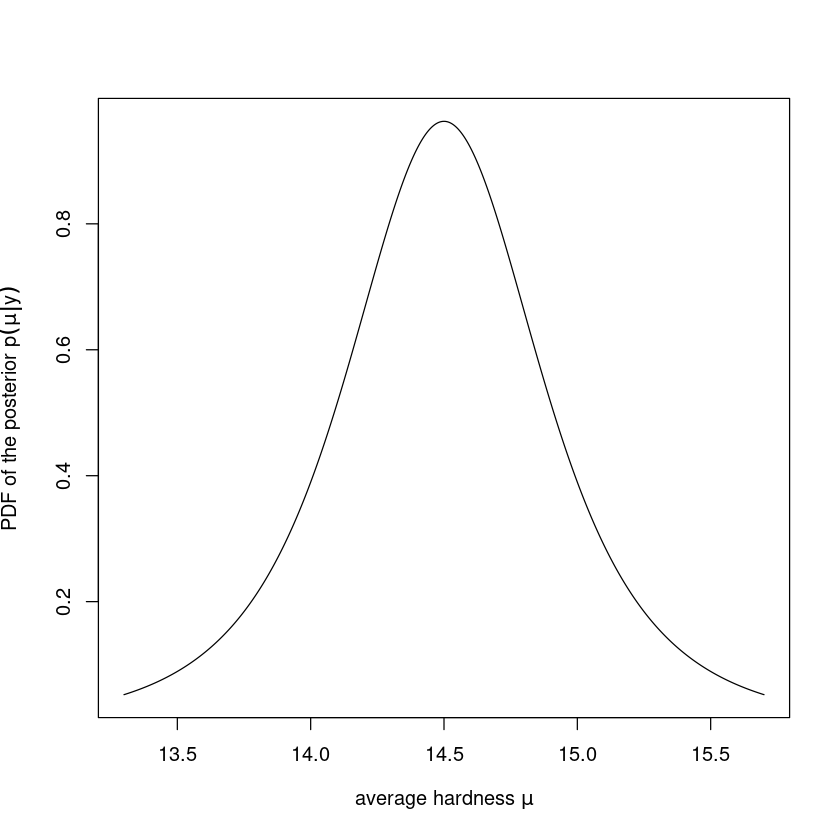

In [24]:
mu_pdf <- function(data, x){
    # Compute necessary parameters here.
    # These are the correct parameters for `windshieldy_test` 
    # with the provided uninformative prior.
    df = 3
    location = 14.5
    scale = 0.3817557
    # Use the computed parameters as below to compute the PDF:
    
    dtnew(x, df, location, scale)
}

x_interval = mu_interval(windshieldy1, .999)
lower_x = x_interval[1]
upper_x = x_interval[2]
x = seq(lower_x, upper_x, length.out=1000)
plot(
    x, mu_pdf(windshieldy1, x), type="l", 
    xlab=TeX(r'(average hardness $\mu$)'), 
    ylab=TeX(r'(PDF of the posterior $p(\mu|y)$)')
)

In [25]:
# Define the inputs for the below: Sufficient Statistics
y <- windshieldy1
n <- length(y)
s2 <- var(y)
my <- mean(y)

# helper functions to sample from and evaluate
# scaled inverse chi-squared distribution
rsinvchisq <- function(n, nu, s2, ...) nu*s2 / rchisq(n , nu, ...)
dsinvchisq <- function(x, nu, s2){
  exp(log(nu/2)*nu/2 - lgamma(nu/2) + log(s2)/2*nu - log(x)*(nu/2+1) - (nu*s2/2)/x)
}


# Sample 1000 draws from marginal posteriors
ns <- 1000
sigma2  <- rsinvchisq(ns, n-1, s2)
mu <- my + sqrt(sigma2/n)*rnorm(length(sigma2))
sigma <- sqrt(sigma2)

# Compute the density in a grid of ranged for the grids
t1l <- c(10, 20)
t2l <- c(0.5, 7)
nl <- c(0.001, 50)
t1 <- seq(t1l[1], t1l[2], length.out = ns)
t2 <- seq(t2l[1], t2l[2], length.out = ns)


# Compute the exact marginal density of mu:
# multiplication by 1./sqrt(s2/n) is due to the transformation of
# variable z=(x-mean(y))/sqrt(s2/n), see BDA3 p. 21
pm <- dt((t1-my) / sqrt(s2/n), n-1) / sqrt(s2/n)

# Estimate the marginal density using samples and ad hoc Gaussian kernel approximation
pmk <- density(mu, adjust = 2, n = ns, from = t1l[1], to = t1l[2])$y

#Compute the exact marginal density of sigma:
# the multiplication by 2*t2 is due to the transformation of
# variable z=t2^2, see BDA3 p. 21
ps <- dsinvchisq(t2^2, n-1, s2) * 2*t2

# Estimate the marginal density using samples and ad hoc Gaussian kernel approximation
psk <- density(sigma, n = ns, from = t2l[1], to = t2l[2])$y


# Evaluate the joint density in a grid. Note that the following is not normalized, but for plotting contours it does not matter :
# Combine grid points into another data frame
# with all pairwise combinations
dfj <- data.frame(t1 = rep(t1, each = length(t2)),
                  t2 = rep(t2, length(t1)))
dfj$z <- dsinvchisq(dfj$t2^2, n-1, s2) * 2*dfj$t2 * dnorm(dfj$t1, my, dfj$t2/sqrt(n))
# breaks for plotting the contours
cl <- seq(1e-5, max(dfj$z), length.out = 6)



# Now, visualise the joint and marginal densities
dfm <- data.frame(t1, Exact = pm, Empirical = pmk) |>
  pivot_longer(cols = !t1, names_to="grp", values_to="p")
margmu <- ggplot(dfm) +
  geom_line(aes(t1, p, color = grp)) +
  coord_cartesian(xlim = t1l) +
  labs(title = 'Marginal of mu', x = '', y = '') +
  scale_y_continuous(breaks = NULL) +
  theme(legend.background = element_blank(),
        legend.position.inside = c(0.75, 0.8),
        legend.title = element_blank())


dfs <- data.frame(t2, Exact = ps, Empirical = psk) |> 
  pivot_longer(cols = !t2, names_to="grp", values_to="p")
margsig <- ggplot(dfs) +
  geom_line(aes(t2, p, color = grp)) +
  coord_cartesian(xlim = t2l) +
  coord_flip() +
  labs(title = 'Marginal of sigma', x = '', y = '') +
  scale_y_continuous(breaks = NULL) +
  theme(legend.background = element_blank(),
        legend.position.inside = c(0.75, 0.8),
        legend.title = element_blank())

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


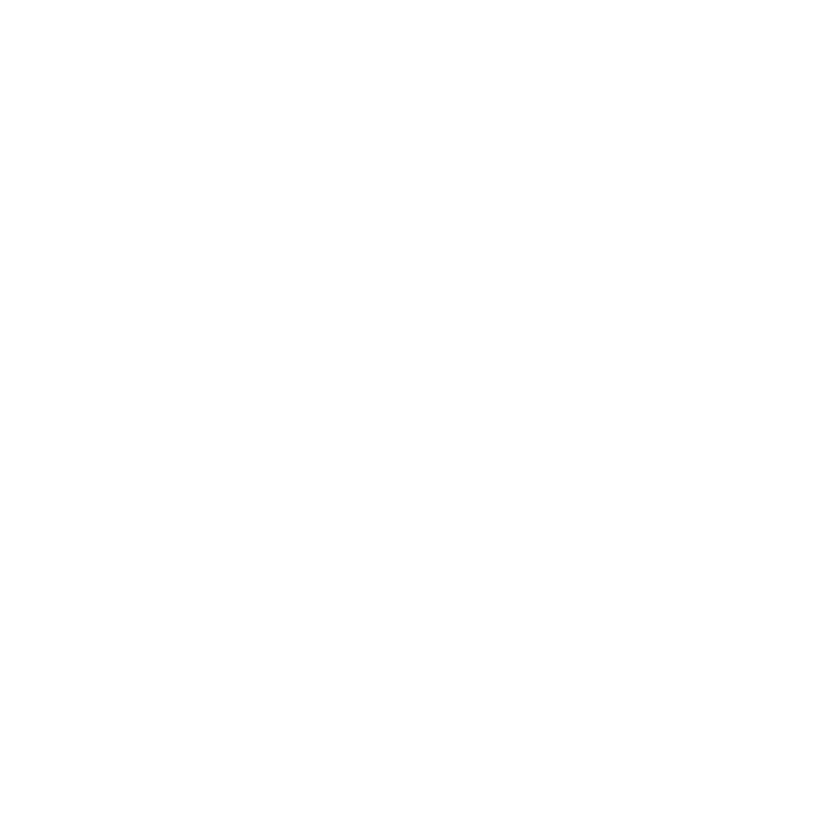

In [26]:
joint1labs <- c('Samples','Exact contour')
joint1 <- ggplot() +
  geom_point(data = data.frame(mu,sigma), aes(mu, sigma, col = '1'), size = 0.1) +
  geom_contour(data = dfj, aes(t1, t2, z = z, col = '2'), breaks = cl) +
  coord_cartesian(xlim = t1l,ylim = t2l) +
  labs(title = 'Joint posterior', x = '', y = '') +
  scale_y_continuous(labels = NULL) +
  scale_x_continuous(labels = NULL) +
  scale_color_manual(values=c('blue', 'black'), labels = joint1labs) +
  guides(color = guide_legend(nrow  = 1, override.aes = list(
    shape = c(16, NA), linetype = c(0, 1), size = c(2, 1)))) +
  theme(legend.background = element_blank(),
        legend.position.inside = c(0.5, 0.9),
        legend.title = element_blank())


# blank plot for combining the plots
bp <- grid.rect(gp = gpar(col = 'white'))

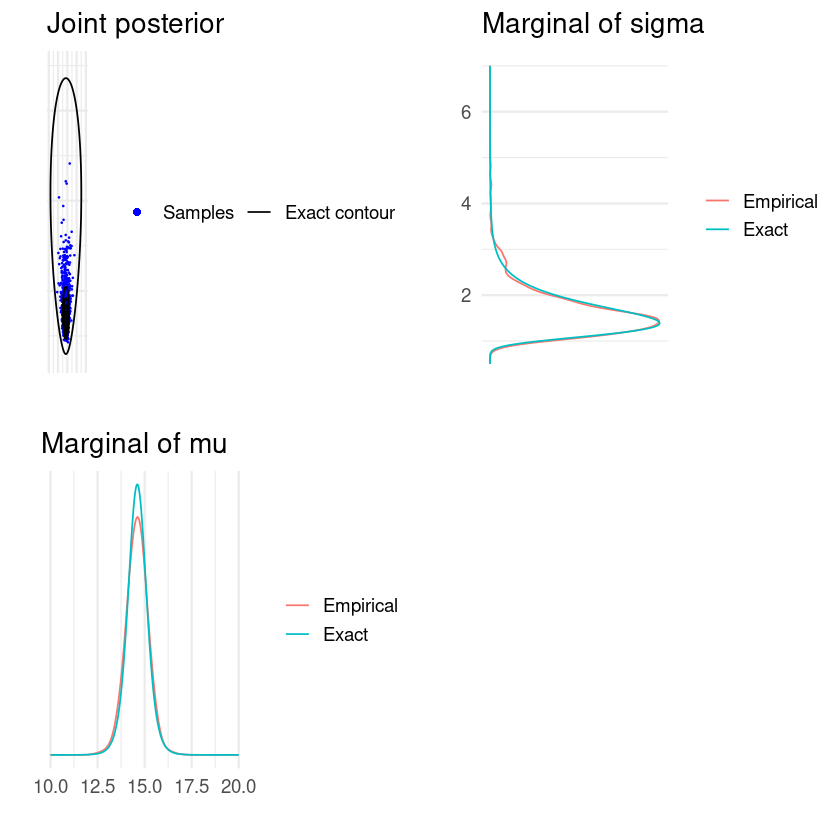

In [27]:
grid.arrange(joint1, margsig, margmu, bp, nrow = 2)

Mean Odds Ratio: 0.5632412 
95% Credible Interval for Odds Ratio: 0.3293241 0.9178037 


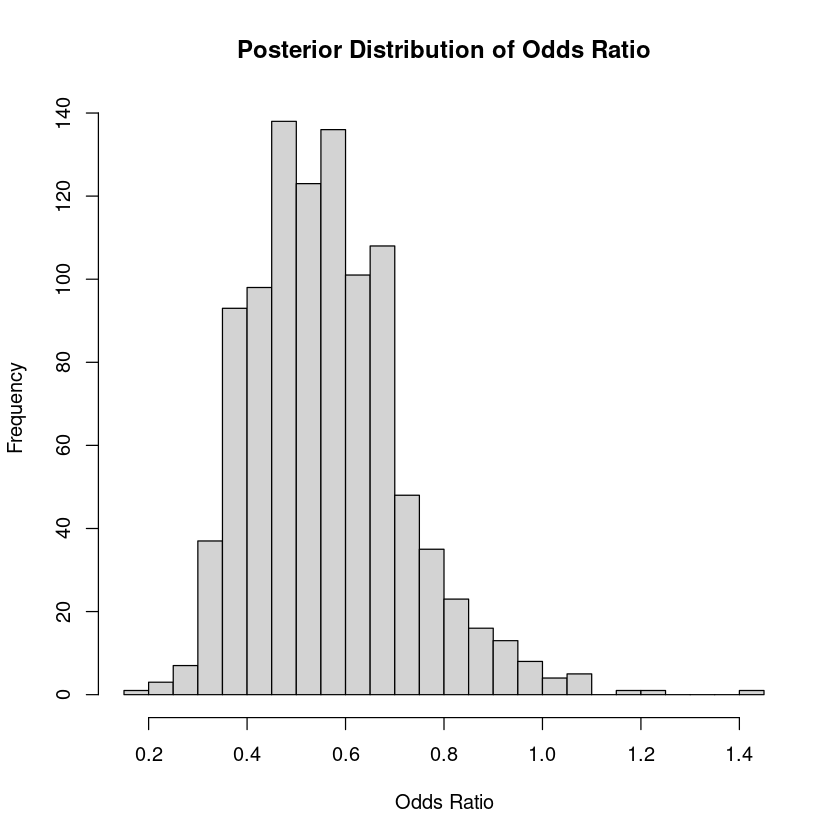

In [28]:
# Set the number of draws
n_draws <- 1000

# Posterior draws for p0 and p1 using Beta distributions
p0_draws <- rbeta(n_draws, 40, 636)
p1_draws <- rbeta(n_draws, 23, 659)

# Compute odds ratio for each draw
odds_ratio_draws <- (p1_draws / (1 - p1_draws)) / (p0_draws / (1 - p0_draws))

# Summarize the posterior distribution of the odds ratio
mean_or <- mean(odds_ratio_draws)  # Mean of the odds ratio
ci_or <- quantile(odds_ratio_draws, c(0.025, 0.975))  # 95% credible interval

# Print the results
cat("Mean Odds Ratio:", mean_or, "\n")
cat("95% Credible Interval for Odds Ratio:", ci_or, "\n")

# Plot the posterior distribution of the odds ratio
hist(odds_ratio_draws, breaks = 30, main = "Posterior Distribution of Odds Ratio", xlab = "Odds Ratio")


Mean Odds Ratio: 0.5752772 
95% Credible Interval for Odds Ratio: 0.3219627 0.9352155 


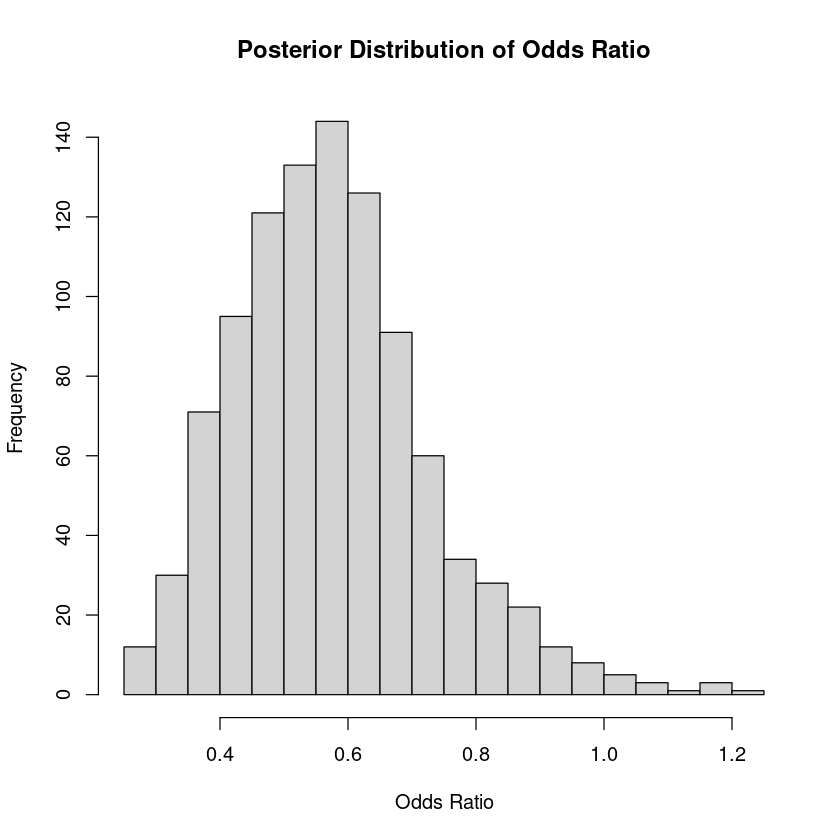

In [29]:
# Set the number of draws
n_draws <- 1000

# Posterior draws for p0 and p1 using Beta distributions
p0_draws <- rbeta(n_draws, 41, 637)
p1_draws <- rbeta(n_draws, 24, 660)

# Compute odds ratio for each draw
odds_ratio_draws <- (p1_draws / (1 - p1_draws)) / (p0_draws / (1 - p0_draws))

# Summarize the posterior distribution of the odds ratio
mean_or <- mean(odds_ratio_draws)  # Mean of the odds ratio
ci_or <- quantile(odds_ratio_draws, c(0.025, 0.975))  # 95% credible interval

# Print the results
cat("Mean Odds Ratio:", mean_or, "\n")
cat("95% Credible Interval for Odds Ratio:", ci_or, "\n")

# Plot the posterior distribution of the odds ratio
hist(odds_ratio_draws, breaks = 30, main = "Posterior Distribution of Odds Ratio", xlab = "Odds Ratio")

Mean Odds Ratio (Beta(2,2) prior): 0.5855957 
95% Credible Interval for Odds Ratio (Beta(2,2) prior): 0.3303034 0.9429298 

Comparison with Beta(1,1) prior:
Mean Odds Ratio (Beta(1,1) prior): 0.5752772 
95% Credible Interval for Odds Ratio (Beta(1,1) prior): 0.3219627 0.9352155 


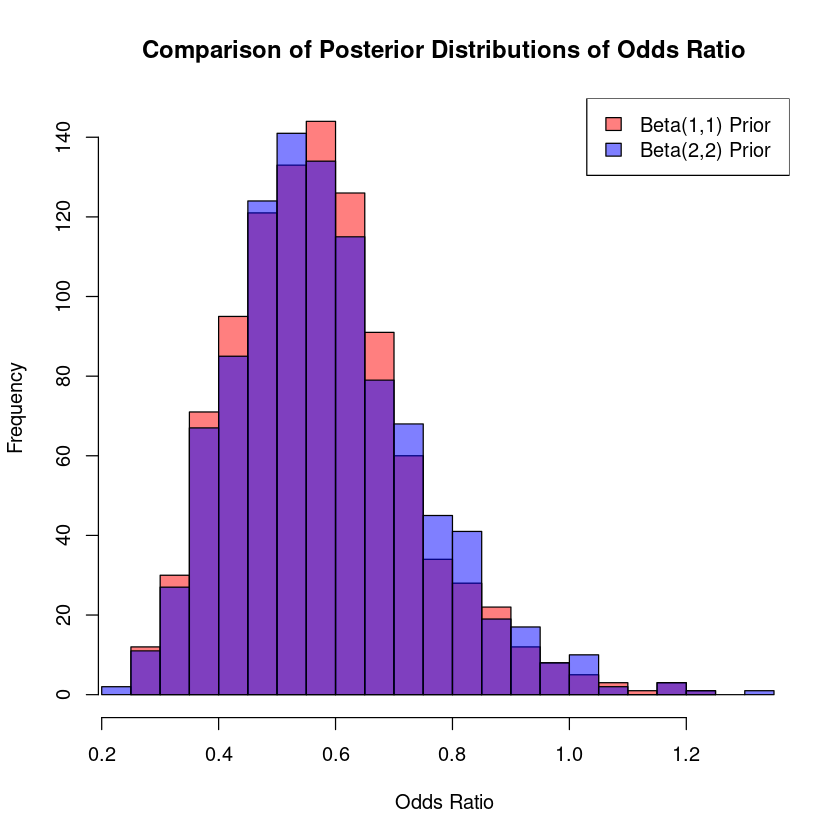

In [30]:
# Set the number of draws
n_draws <- 1000

# Posterior draws for p0 and p1 using Beta(2,2) prior
p0_draws_weak <- rbeta(n_draws, 41, 637)  # Posterior with Beta(2,2) prior for p0
p1_draws_weak <- rbeta(n_draws, 24, 660)  # Posterior with Beta(2,2) prior for p1

# Compute odds ratio for each draw
odds_ratio_draws_weak <- (p1_draws_weak / (1 - p1_draws_weak)) / (p0_draws_weak / (1 - p0_draws_weak))

# Summarize the posterior distribution of the odds ratio
mean_or_weak <- mean(odds_ratio_draws_weak)  # Mean of the odds ratio
ci_or_weak <- quantile(odds_ratio_draws_weak, c(0.025, 0.975))  # 95% credible interval

# Print the results
cat("Mean Odds Ratio (Beta(2,2) prior):", mean_or_weak, "\n")
cat("95% Credible Interval for Odds Ratio (Beta(2,2) prior):", ci_or_weak, "\n")

# Compare with Beta(1,1) prior
cat("\nComparison with Beta(1,1) prior:\n")
cat("Mean Odds Ratio (Beta(1,1) prior):", mean_or, "\n")
cat("95% Credible Interval for Odds Ratio (Beta(1,1) prior):", ci_or, "\n")

# Plot comparison of posterior distributions
hist(odds_ratio_draws, breaks = 30, col = rgb(1, 0, 0, 0.5), main = "Comparison of Posterior Distributions of Odds Ratio", xlab = "Odds Ratio", xlim = range(c(odds_ratio_draws, odds_ratio_draws_weak)))
hist(odds_ratio_draws_weak, breaks = 30, col = rgb(0, 0, 1, 0.5), add = TRUE)
legend("topright", legend=c("Beta(1,1) Prior", "Beta(2,2) Prior"), fill=c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5)))


3. Inference for the difference between normal means


In [33]:

data("windshieldy2")
head(windshieldy2)

[1] 15.980 14.206 16.011 17.250 15.993 15.722

In [34]:
# Install and load the aaltobda package
if (!require(aaltobda)) {
    install.packages("aaltobda")
    library(aaltobda)
}

# Load the datasets
data("windshieldy1", package = "aaltobda")
data("windshieldy2", package = "aaltobda")

# Get the hardness measurements for both production lines
y1 <- windshieldy1
y2 <- windshieldy2

# Calculate the sample statistics for both y1 and y2
y1_mean <- mean(y1)
y2_mean <- mean(y2)

y1_var <- var(y1)
y2_var <- var(y2)

y1_sd <- sd(y1)
y2_sd <- sd(y2)

n <- length(y1)  # Assuming same number of samples for both y1 and y2

# Report summary statistics
cat("Summary statistics for y1:\n")
cat("Mean:", y1_mean, "\n")
cat("Standard Deviation:", y1_sd, "\n")
cat("Sample Variance:", y1_var, "\n\n")

cat("Summary statistics for y2:\n")
cat("Mean:", y2_mean, "\n")
cat("Standard Deviation:", y2_sd, "\n")
cat("Sample Variance:", y2_var, "\n")


Summary statistics for y1:
Mean: 14.61122 
Standard Deviation: 1.474162 
Sample Variance: 2.173153 

Summary statistics for y2:
Mean: 15.82108 
Standard Deviation: 0.8726099 
Sample Variance: 0.7614481 


In [35]:
# Calculate 95% posterior intervals for the means (mu1 and mu2)
alpha <- 0.05
t_critical <- qt(1 - alpha/2, df = n-1)

# Posterior interval for mu1
mu1_lower <- y1_mean - t_critical * (y1_sd / sqrt(n))
mu1_upper <- y1_mean + t_critical * (y1_sd / sqrt(n))

# Posterior interval for mu2
mu2_lower <- y2_mean - t_critical * (y2_sd / sqrt(n))
mu2_upper <- y2_mean + t_critical * (y2_sd / sqrt(n))

cat("95% posterior interval for mu1:", round(mu1_lower, 3), "-", round(mu1_upper, 3), "\n")
cat("95% posterior interval for mu2:", round(mu2_lower, 3), "-", round(mu2_upper, 3), "\n")


95% posterior interval for mu1: 13.478 - 15.744 
95% posterior interval for mu2: 15.15 - 16.492 


Mean of mu_d: -1.214 
95% credible interval for mu_d: -2.48 to 0.029 


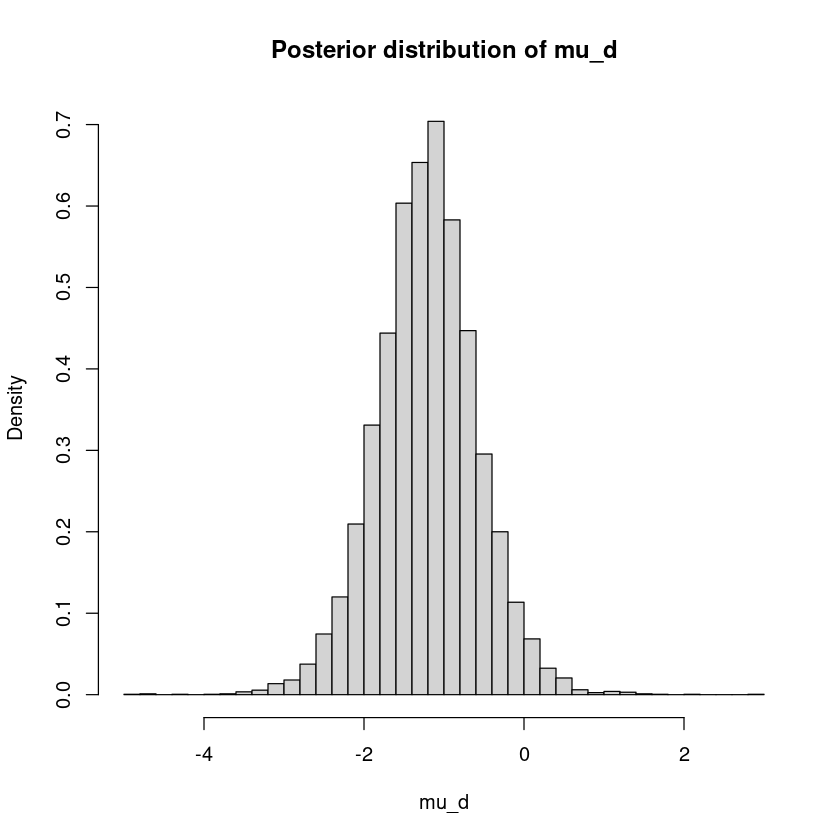

In [38]:
# Assuming you have already computed the posterior distributions of mu1 and mu2
n1 <- length(y1)
n2 <- length(y2)

# Number of samples
n_samples <- 10000

# Calculate degrees of freedom and standard error
df1 <- n1 - 1
df2 <- n2 - 1

# Draw samples from the posterior distributions using rt (Student's t-distribution)
mu1_samples <- rt(n_samples, df = df1) * (sd(y1) / sqrt(n1)) + mean(y1)
mu2_samples <- rt(n_samples, df = df2) * (sd(y2) / sqrt(n2)) + mean(y2)

# Compute the differences between mu1 and mu2
mu_d_samples <- mu1_samples - mu2_samples

# Summary statistics for mu_d
mean_mu_d <- mean(mu_d_samples)
ci_mu_d <- quantile(mu_d_samples, probs = c(0.025, 0.975))

# Output the results
cat("Mean of mu_d:", round(mean_mu_d, 3), "\n")
cat("95% credible interval for mu_d:", round(ci_mu_d[1], 3), "to", round(ci_mu_d[2], 3), "\n")

# Optional: Plot the posterior distribution of mu_d
hist(mu_d_samples, breaks=50, probability=TRUE, main="Posterior distribution of mu_d", xlab="mu_d")



In [39]:
# Compute the differences between mu1 and mu2
mu_d_samples <- mu1_samples - mu2_samples

# Compute the point estimate (mean of the differences)
point_estimate_mu_d <- mean(mu_d_samples)

# Output the point estimate rounded to three decimal places
cat("Point estimate E(mu_d | y1, y2):", round(point_estimate_mu_d, 3), "\n")

Point estimate E(mu_d | y1, y2): -1.214 


In [40]:
# Compute the 95% credible interval
ci_mu_d <- quantile(mu_d_samples, probs = c(0.025, 0.975))

# Output the 95% credible interval for mu_d with three decimal digits
cat("95% credible interval for mu_d:", round(ci_mu_d[1], 3), "to", round(ci_mu_d[2], 3), "\n")

95% credible interval for mu_d: -2.48 to 0.029 


In [41]:
# Compute the differences between mu1 and mu2
mu_d_samples <- mu1_samples - mu2_samples

# Compute the probability that mu1 < mu2 (i.e., mu_d < 0)
prob_mu1_less_mu2 <- mean(mu_d_samples < 0)

# Output the probability rounded to two decimal places
cat("Probability that μ1 < μ2:", round(prob_mu1_less_mu2, 2), "\n")

Probability that μ1 < μ2: 0.97 
